# Analisi dei 3 giorni antecedenti all'inizio della variazione dei picchi NFT (sia positivi che negativi) esaminando anche la sentiment analysis dei tweet e il punteggio totale (di ogni singolo tweet) che mi serve a capire quali sono stati i tweet più influenti

### Importazione librerie e datadrames

In [141]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import mplcursors
import plotly.express as px
from datetime import datetime
from tabulate import tabulate
import numpy as np
import os


In [142]:
# Caricamento dei dataset
top_nft_positivi = pd.read_csv("../dataframes/top_nft_positivi_df.csv")
top_nft_negativi = pd.read_csv("../dataframes/top_nft_negativi_df.csv")
tweets_sentiment = pd.read_csv("../dataframes/tweets_sentiment_df.csv") 
tweets_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")

# Converti le colonne delle date in formato datetime
top_nft_positivi['data_inizio'] = pd.to_datetime(top_nft_positivi['data_inizio'])
top_nft_negativi['data_inizio'] = pd.to_datetime(top_nft_negativi['data_inizio'])
tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

## Analisi top nft POSITIVI

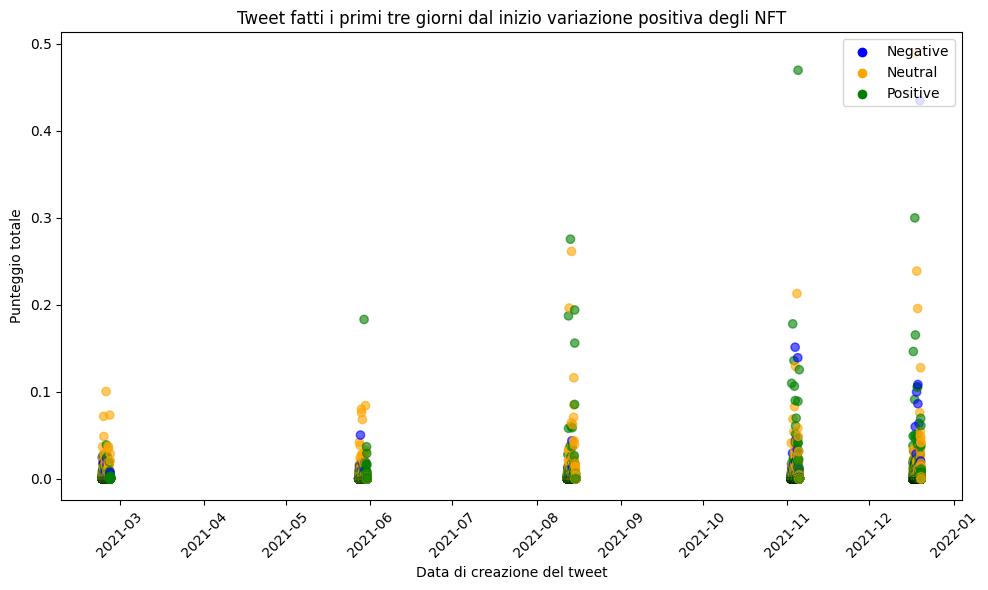

In [144]:
# Preparazione per il filtraggio dei tweet
tweets_nei_primi_tre_giorni = []

# Iterazione su ciascun picco positivo
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]

    # Aggiungi i tweet filtrati alla lista
    tweets_nei_primi_tre_giorni.append(tweets_filtrati)

# Concatena tutti i dataframe di tweet filtrati in uno unico
tweets_nei_primi_tre_giorni = pd.concat(tweets_nei_primi_tre_giorni)

# Verifica e gestione dei valori NaN in 'Sentiment'
tweets_nei_primi_tre_giorni['Sentiment'] = tweets_nei_primi_tre_giorni['Sentiment'].fillna('neutrale')

# Mappa dei colori in base al sentiment
colori_sentiment = {
    'Negative': 'blue',
    'Neutral': 'orange',
    'Positive': 'green'
}

# Aggiungi una colonna di colori basata sul sentiment
tweets_nei_primi_tre_giorni['colori_sentiment'] = tweets_nei_primi_tre_giorni['Sentiment'].map(colori_sentiment)

# Grafico dei tweet filtrati in base al punteggio totale con colori basati sul sentiment
plt.figure(figsize=(10, 6))
plt.scatter(tweets_nei_primi_tre_giorni['created_at'], tweets_nei_primi_tre_giorni['punteggio_totale'], 
            color=tweets_nei_primi_tre_giorni['colori_sentiment'], alpha=0.6)
plt.title('Tweet fatti i primi tre giorni dal inizio variazione positiva degli NFT')
plt.xlabel('Data di creazione del tweet')
plt.ylabel('Punteggio totale')
plt.xticks(rotation=45)
# Legenda
handles = []
labels = []
for sentiment, color in colori_sentiment.items():
    handles.append(plt.scatter([], [], color=color, label=sentiment))
    labels.append(sentiment)
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

### Per ogni picco positivo stampo una tabella che riporta la data di creazione, il punteggio totale (in ordine descrescente) e il valore della sentiment

In [145]:
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']

    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Ordina i tweet filtrati per punteggio totale
    tweets_ordinati = tweets_filtrati.sort_values(by='punteggio_totale', ascending=False)
    
    # Seleziona solo le colonne rilevanti per la tabella
    tweets_da_mostrare = tweets_ordinati[['created_at', 'punteggio_totale', 'Sentiment']]
    
    # Converti la colonna 'created_at' in formato stringa per la visualizzazione
    tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    # Converti il dataframe in una lista di tuple per l'uso con tabulate
    tabella_tweet = tweets_da_mostrare.values.tolist()

    # Stampare le informazioni sui picchi positivi NFT
    print(f"\nPicco positivo NFT: {index} ({data_inizio_variazione} - {data_fine_variazione})")
    
    # Stampa la tabella
    print(tabulate(tabella_tweet, headers=['create_at', 'punteggio_totale', 'Sentiment'], tablefmt='pretty'))

    print ('**********************')


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_2154/912873028.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')



Picco positivo NFT: 0 (2021-08-15 07:05:16 - 2021-08-30 16:33:32)
+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-08-13 10:19:09 |   0.2753792109458617   | Positive  |
| 2021-08-13 19:30:43 |   0.2613620707253581   |  Neutral  |
| 2021-08-12 23:08:08 |   0.1962364572108515   |  Neutral  |
| 2021-08-14 23:37:14 |   0.1939855497668958   | Positive  |
| 2021-08-12 16:58:26 |   0.1872362296013296   | Positive  |
| 2021-08-14 23:52:15 |   0.155912547995338    | Positive  |
| 2021-08-14 16:05:00 |   0.1160434899991375   |  Neutral  |
| 2021-08-14 22:55:35 |   0.0854264994747343   | Positive  |
| 2021-08-14 16:43:34 |   0.0848355644738111   |  Neutral  |
| 2021-08-14 14:23:24 |   0.0706657804866366   |  Neutral  |
| 2021-08-13 18:15:25 |   0.0644265212862125   |  Neutral  |
| 2021-08-14 06:14:47 |   0.0621984058956918   |  Neutral  |
| 2021-08-13 15:01

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_2154/912873028.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')


+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-11-04 22:41:57 |   0.4695891010625175   | Positive  |
| 2021-11-04 13:06:30 |   0.2127948371345316   |  Neutral  |
| 2021-11-03 00:00:42 |   0.1780246249806165   | Positive  |
| 2021-11-03 20:55:50 |   0.1512128054337212   | Negative  |
| 2021-11-04 20:13:56 |   0.1390945843494118   | Negative  |
| 2021-11-03 10:40:09 |   0.135753820401923    | Positive  |
| 2021-11-03 23:12:07 |   0.1292904899313642   |  Neutral  |
| 2021-11-05 09:08:39 |   0.1253241305678006   | Positive  |
| 2021-11-02 14:36:55 |   0.1097143025279571   | Positive  |
| 2021-11-03 14:41:22 |   0.106467778804534    | Positive  |
| 2021-11-03 22:01:52 |   0.0899200398539905   | Positive  |
| 2021-11-04 21:31:48 |   0.0890027714647925   | Positive  |
| 2021-11-03 15:54:32 |   0.0829090919490825   |  Neutral  |
| 2021-11-04 05:59:54 | 

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_2154/912873028.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')


+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-02-24 00:14:30 |   0.1002877208153558   |  Neutral  |
| 2021-02-25 08:18:22 |   0.0731497297070668   |  Neutral  |
| 2021-02-23 02:37:21 |   0.0716953498881509   |  Neutral  |
| 2021-02-23 04:46:24 |   0.0485398898414283   |  Neutral  |
| 2021-02-24 02:48:20 |   0.0388511801268922   | Positive  |
| 2021-02-24 18:45:43 |   0.037348306828766    |  Neutral  |
| 2021-02-22 17:28:22 |   0.0366424823068672   |  Neutral  |
| 2021-02-24 22:48:07 |    0.03535002120291    |  Neutral  |
| 2021-02-24 06:22:49 |   0.0316103893577455   |  Neutral  |
| 2021-02-25 13:32:26 |   0.0285979595701295   |  Neutral  |
| 2021-02-23 04:56:46 |   0.0284538649816202   |  Neutral  |
| 2021-02-22 22:25:56 |   0.026897895920419    | Positive  |
| 2021-02-24 12:30:31 |   0.0252712317171199   | Positive  |
| 2021-02-24 02:40:27 | 

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_2154/912873028.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')


+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-05-29 16:44:15 |   0.1831244855271958   | Positive  |
| 2021-05-30 04:50:17 |   0.0840229061685908   |  Neutral  |
| 2021-05-28 17:31:19 |   0.0798974361660434   |  Neutral  |
| 2021-05-28 18:08:49 |   0.0758756066355273   |  Neutral  |
| 2021-05-29 02:13:49 |   0.0680530879431585   |  Neutral  |
| 2021-05-28 08:52:57 |   0.0501832050709695   | Negative  |
| 2021-05-27 22:43:52 |   0.041752526363668    |  Neutral  |
| 2021-05-28 06:34:18 |   0.0383344455865951   |  Neutral  |
| 2021-05-30 14:19:30 |   0.036822444553557    | Positive  |
| 2021-05-30 09:09:53 |   0.0324787418108463   |  Neutral  |
| 2021-05-30 16:48:47 |   0.0290735801690904   | Positive  |
| 2021-05-28 20:53:35 |   0.0282752049576332   |  Neutral  |
| 2021-05-29 01:30:37 |   0.0281814606948568   |  Neutral  |
| 2021-05-29 21:24:40 | 

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_2154/912873028.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')


+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-12-18 01:09:11 |   0.4887218189357467   |  Neutral  |
| 2021-12-19 16:14:12 |   0.4346016792938817   | Negative  |
| 2021-12-17 19:04:51 |   0.2998202252779522   | Positive  |
| 2021-12-18 12:14:38 |   0.2386695428107977   |  Neutral  |
| 2021-12-18 19:55:12 |   0.1956658482116942   |  Neutral  |
| 2021-12-18 00:09:14 |   0.1652145851290714   | Positive  |
| 2021-12-17 06:08:15 |   0.1462746434722147   | Positive  |
| 2021-12-19 22:10:41 |   0.1276281190497679   |  Neutral  |
| 2021-12-18 22:07:16 |   0.108339416882714    | Negative  |
| 2021-12-18 16:44:00 |   0.1057720755904564   | Positive  |
| 2021-12-18 19:46:19 |   0.1052523121488928   | Positive  |
| 2021-12-18 10:44:59 |   0.0997121430812223   | Negative  |
| 2021-12-17 17:23:14 |   0.0910986851913153   | Positive  |
| 2021-12-18 22:25:11 | 

### Per ogni picco mi stampo il numero totale di tweet che possiete i tre giorni precedenti alla data di inizio del picco e il numero di tweet con sentiment positivo, negativo e neutrale

In [146]:
# Iterazione su ciascun picco positivo
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine'] 
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Calcola il numero totale di tweet
    numero_totale_tweet = len(tweets_filtrati)

    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati['Sentiment'].value_counts()
    
    # Stampa il titolo del picco positivo
    print(f"\nPicco positivo NFT: {index} ({data_inizio_variazione} - {data_fine_variazione})")
    print(f"Numero totale di tweet: {numero_totale_tweet}")
    print(f"Numero di tweet per ogni sentiment:")
    for sentiment, count in conteggio_sentiment.items():
        print("- "f"{sentiment}: {count}")
    
    print ('**********************')


Picco positivo NFT: 0 (2021-08-15 07:05:16 - 2021-08-30 16:33:32)
Numero totale di tweet: 14026
Numero di tweet per ogni sentiment:
- Positive: 6215
- Neutral: 5880
- Negative: 1931
**********************

Picco positivo NFT: 1 (2021-11-05 09:46:35 - 2021-11-05 18:42:28)
Numero totale di tweet: 23987
Numero di tweet per ogni sentiment:
- Positive: 11717
- Neutral: 9438
- Negative: 2832
**********************

Picco positivo NFT: 2 (2021-02-25 14:23:29 - 2021-02-26 02:48:36)
Numero totale di tweet: 7083
Numero di tweet per ogni sentiment:
- Positive: 3139
- Neutral: 2617
- Negative: 1327
**********************

Picco positivo NFT: 3 (2021-05-30 18:06:57 - 2021-06-01 06:39:14)
Numero totale di tweet: 8338
Numero di tweet per ogni sentiment:
- Positive: 3905
- Neutral: 3299
- Negative: 1134
**********************

Picco positivo NFT: 4 (2021-12-20 02:29:35 - 2022-01-18 23:35:20)
Numero totale di tweet: 35917
Numero di tweet per ogni sentiment:
- Neutral: 16275
- Positive: 15709
- Negativ

### Calcolo la media del punteggio totale per ogni picco, scarto i tweet sotto a quella media e mi ricalcolo il numero totale dei tweet del picco e il numero di quelli positivi, neutrali e negativi

In [147]:
# Dizionari per raccogliere i dati per i grafici
data_picchi = []
num_tweet_positivi = []
num_tweet_negativi = []
num_tweet_neutrali = []
punteggio_totale_positivi = []
punteggio_totale_negativi = []
punteggio_totale_neutrali = []

for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine'] 
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Calcola il numero totale di tweet
    numero_totale_tweet = len(tweets_filtrati)

    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati['Sentiment'].value_counts()
    
    print(f"\nPicco positivo NFT: {index} ({data_inizio_variazione} - {data_fine_variazione})")

    # Calcola la media del punteggio totale
    media_punteggio_totale = tweets_filtrati['punteggio_totale'].mean()
    print(f"Media del punteggio totale: {media_punteggio_totale:.4f}")
    
    # Filtra i tweet con punteggio totale superiore alla media
    tweets_filtrati_superiori_media_positivi = tweets_filtrati[tweets_filtrati['punteggio_totale'] > media_punteggio_totale]
    
    print(f"Numero di tweet con punteggio totale sopra la media: {len(tweets_filtrati_superiori_media_positivi)}")
    
    print(f"Numero di tweet per ogni sentiment:")
    for sentiment, count in conteggio_sentiment.items():
        print("- "f"{sentiment}: {count}")

    print ('**********************')

    # VARIABILI CHE SERVONO PER I DUE GRAFICI DOPO
    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati_superiori_media_positivi['Sentiment'].value_counts()

    # Aggiungi i dati raccolti ai dizionari
    data_picchi.append(f"{data_inizio_variazione} - {data_fine_variazione}")
    num_tweet_positivi.append(conteggio_sentiment.get('Positive', 0))
    num_tweet_negativi.append(conteggio_sentiment.get('Negative', 0))
    num_tweet_neutrali.append(conteggio_sentiment.get('Neutral', 0))

    # Calcola il punteggio totale per ciascun tipo di sentimento
    punteggio_totale_positivi.append(tweets_filtrati_superiori_media_positivi[tweets_filtrati_superiori_media_positivi['Sentiment'] == 'Positive']['punteggio_totale'].sum())
    punteggio_totale_negativi.append(tweets_filtrati_superiori_media_positivi[tweets_filtrati_superiori_media_positivi['Sentiment'] == 'Negative']['punteggio_totale'].sum())
    punteggio_totale_neutrali.append(tweets_filtrati_superiori_media_positivi[tweets_filtrati_superiori_media_positivi['Sentiment'] == 'Neutral']['punteggio_totale'].sum())

    


Picco positivo NFT: 0 (2021-08-15 07:05:16 - 2021-08-30 16:33:32)
Media del punteggio totale: 0.0004
Numero di tweet con punteggio totale sopra la media: 1430
Numero di tweet per ogni sentiment:
- Positive: 6215
- Neutral: 5880
- Negative: 1931
**********************

Picco positivo NFT: 1 (2021-11-05 09:46:35 - 2021-11-05 18:42:28)
Media del punteggio totale: 0.0003
Numero di tweet con punteggio totale sopra la media: 2451
Numero di tweet per ogni sentiment:
- Positive: 11717
- Neutral: 9438
- Negative: 2832
**********************

Picco positivo NFT: 2 (2021-02-25 14:23:29 - 2021-02-26 02:48:36)
Media del punteggio totale: 0.0004
Numero di tweet con punteggio totale sopra la media: 967
Numero di tweet per ogni sentiment:
- Positive: 3139
- Neutral: 2617
- Negative: 1327
**********************

Picco positivo NFT: 3 (2021-05-30 18:06:57 - 2021-06-01 06:39:14)
Media del punteggio totale: 0.0004
Numero di tweet con punteggio totale sopra la media: 1121
Numero di tweet per ogni sentimen

### Visione grafica

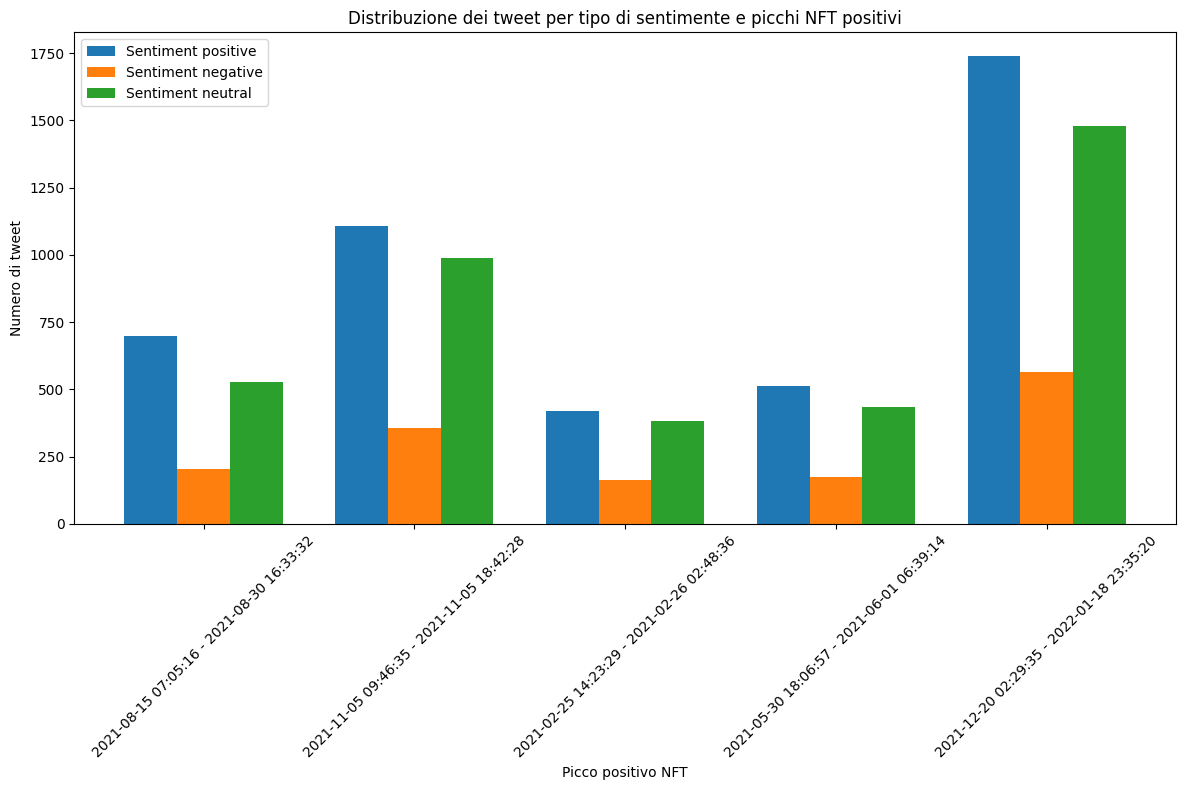

In [148]:
# Creazione dei grafici a barre
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(data_picchi))

# Plotting per i tweet positivi, negativi e neutrali
plt.bar(index, num_tweet_positivi, width=bar_width, label='Sentiment positive')
plt.bar([i + bar_width for i in index], num_tweet_negativi, width=bar_width, label='Sentiment negative')
plt.bar([i + 2 * bar_width for i in index], num_tweet_neutrali, width=bar_width, label='Sentiment neutral')

# Impostazioni grafiche
plt.xlabel('Picco positivo NFT')
plt.ylabel('Numero di tweet')
plt.title('Distribuzione dei tweet per tipo di sentimente e picchi NFT positivi')
plt.xticks([i + bar_width for i in index], data_picchi, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


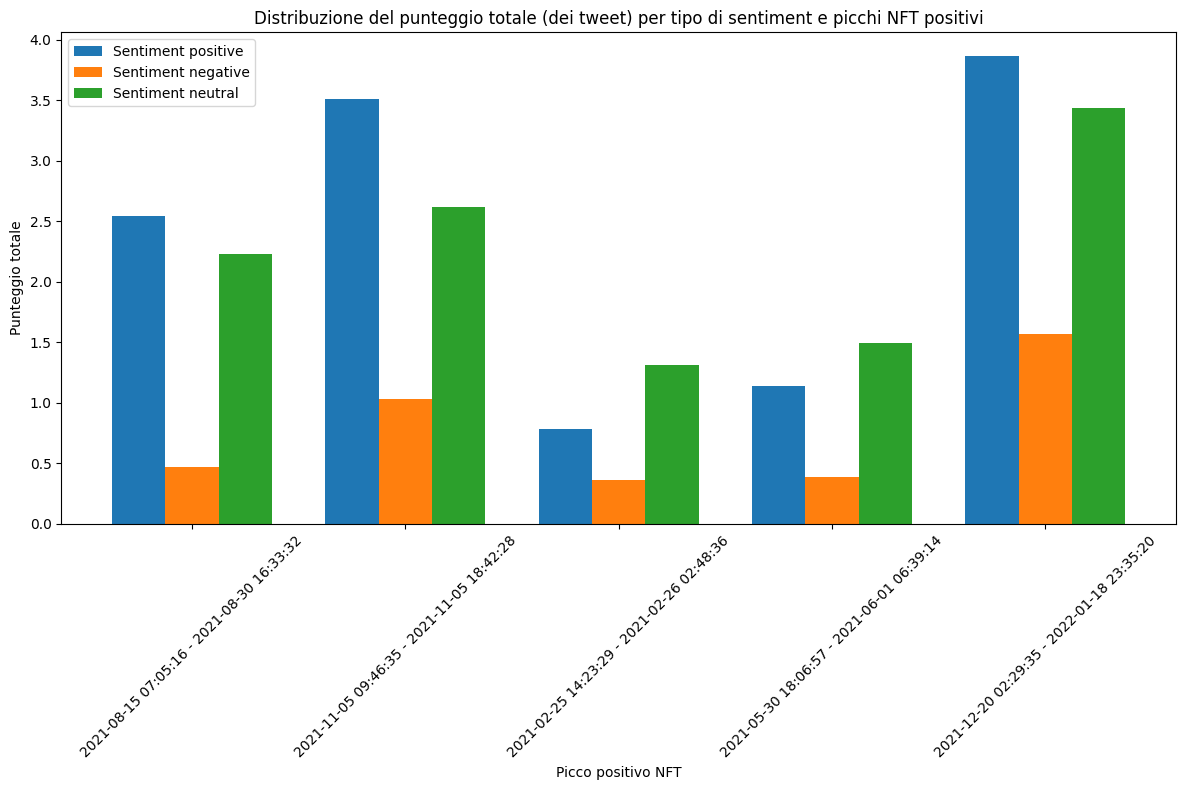

In [149]:
# Creazione dei grafici a barre
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(data_picchi))

# Plotting per i tweet positivi, negativi e neutrali
plt.bar(index, punteggio_totale_positivi, width=bar_width, label='Sentiment positive')
plt.bar([i + bar_width for i in index], punteggio_totale_negativi, width=bar_width, label='Sentiment negative')
plt.bar([i + 2 * bar_width for i in index], punteggio_totale_neutrali, width=bar_width, label='Sentiment neutral')

# Impostazioni grafiche
plt.xlabel('Picco positivo NFT')
plt.ylabel('Punteggio totale')
plt.title('Distribuzione del punteggio totale (dei tweet) per tipo di sentiment e picchi NFT positivi')
plt.xticks([i + bar_width for i in index], data_picchi, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### Per ogni tweet filtrato in base alla media (vedi cella sopra) ho aggiunto come colonna quella della collezione in modo tale che sappiamo l'argomento del tweet

In [150]:
# Merge con il dataset delle collezioni 
tweets_positivi_collezione = pd.merge(tweets_filtrati_superiori_media_positivi, tweets_collection, left_on='tweet_id', right_on='tweet_id', how='left')
print(tweets_positivi_collezione.head())

           created_at             tweet_id            author_id  \
0 2021-12-17 02:30:53  1471669198187286528  1469087296502775811   
1 2021-12-17 02:30:57  1471669213198753795   791832085501620224   
2 2021-12-17 02:33:30  1471669853845016576  1240385359055335429   
3 2021-12-17 02:33:33  1471669869582114818  1346092278637445122   
4 2021-12-17 02:33:34  1471669874191581185  1427781610984722434   

                                             content  retweet_count  \
0  ser semplin got draw beautiful doads today . t...              5   
1  @ regannotraygan I ’ biased @ jenkinsthevalet ...              3   
2  agreeing tweet said “ bayc ” dare https : //t....              0   
3  @ RealAllenHena # zunks ' traits generated cha...              3   
4  Did someone say free Morie ? ! ? ! ? ! ? ! # L...              2   

   reply_count  like_count  quote_count  punteggio_totale  \
0            3          20            0          0.000628   
1            2          20            0         

## Analisi top nft NEGATIVI

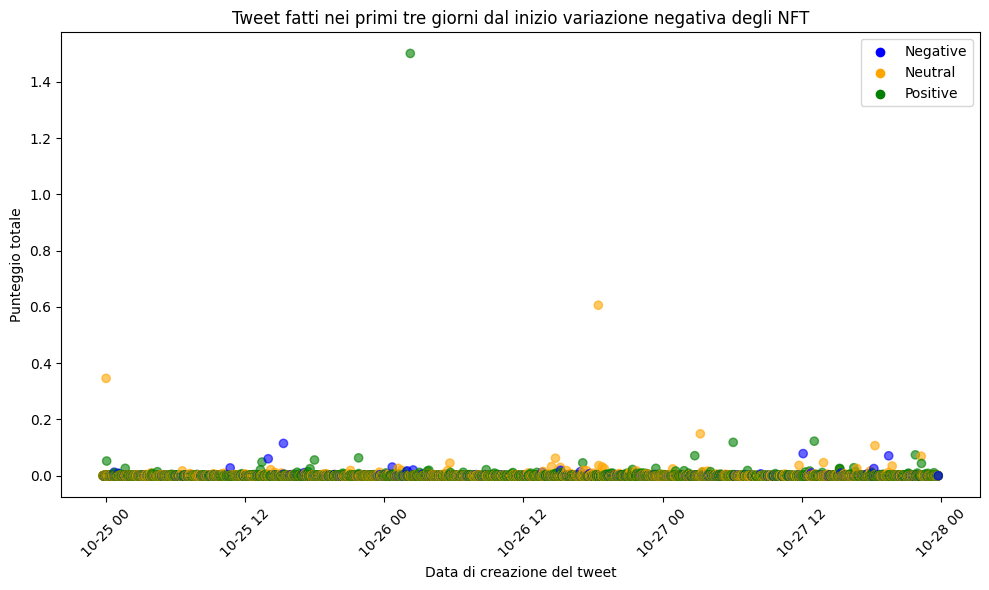

In [151]:
# Preparazione per il filtraggio dei tweet
tweets_nei_primi_tre_giorni_negativi = []

# Iterazione su ciascun picco negativo
for index, row in top_nft_negativi.iterrows():  # Assumi che 'top_nft_negativi' sia il DataFrame contenente i picchi negativi degli NFT
    data_inizio_variazione = row['data_inizio']
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]

    # Aggiungi i tweet filtrati alla lista
    tweets_nei_primi_tre_giorni_negativi.append(tweets_filtrati)

# Concatena tutti i dataframe di tweet filtrati in uno unico
tweets_nei_primi_tre_giorni_negativi = pd.concat(tweets_nei_primi_tre_giorni_negativi)

# Verifica e gestione dei valori NaN in 'Sentiment'
tweets_nei_primi_tre_giorni_negativi['Sentiment'] = tweets_nei_primi_tre_giorni_negativi['Sentiment'].fillna('neutrale')

# Mappa dei colori in base al sentiment
colori_sentiment = {
    'Negative': 'blue',
    'Neutral': 'orange',
    'Positive': 'green'
}

# Aggiungi una colonna di colori basata sul sentiment
tweets_nei_primi_tre_giorni_negativi['colori_sentiment'] = tweets_nei_primi_tre_giorni_negativi['Sentiment'].map(colori_sentiment)

# Grafico dei tweet filtrati in base al punteggio totale con colori basati sul sentiment
plt.figure(figsize=(10, 6))
plt.scatter(tweets_nei_primi_tre_giorni_negativi['created_at'], tweets_nei_primi_tre_giorni_negativi['punteggio_totale'], 
            color=tweets_nei_primi_tre_giorni_negativi['colori_sentiment'], alpha=0.6)
plt.title('Tweet fatti nei primi tre giorni dal inizio variazione negativa degli NFT')
plt.xlabel('Data di creazione del tweet')
plt.ylabel('Punteggio totale')
plt.xticks(rotation=45)
# Legenda
handles = []
labels = []
for sentiment, color in colori_sentiment.items():
    handles.append(plt.scatter([], [], color=color, label=sentiment))
    labels.append(sentiment)
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


In [152]:
# Preparazione per il filtraggio dei tweet
tweets_nei_primi_tre_giorni_negativi = []

# Iterazione su ciascun picco negativo
for index, row in top_nft_negativi.iterrows(): 
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Ordina i tweet filtrati per punteggio totale
    tweets_ordinati = tweets_filtrati.sort_values(by='punteggio_totale', ascending=False)
    
    # Seleziona solo le colonne rilevanti per la tabella
    tweets_da_mostrare = tweets_ordinati[['created_at', 'punteggio_totale', 'Sentiment']]
    
    # Converti la colonna 'created_at' in formato stringa per la visualizzazione
    tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    # Converti il dataframe in una lista di tuple per l'uso con tabulate
    tabella_tweet = tweets_da_mostrare.values.tolist()

    # Stampare le informazioni sui picchi negativi NFT
    print(f"\nPicco negativo NFT: {index} ({data_inizio_variazione} - {data_fine_variazione})")
    
    # Stampa la tabella formattata
    print(tabulate(tabella_tweet, headers=['created_at', 'punteggio_totale', 'Sentiment'], tablefmt='pretty'))

    print ('**********************')


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_2154/3292511425.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')



Picco negativo NFT: 0 (2021-10-27 23:46:06 - 2021-11-04 19:14:53)
+---------------------+------------------------+-----------+
|     created_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-10-26 02:15:34 |   1.5006789185716591   | Positive  |
| 2021-10-26 18:28:01 |   0.6061026070770331   |  Neutral  |
| 2021-10-25 00:02:09 |   0.3461462902816544   |  Neutral  |
| 2021-10-27 03:15:35 |   0.149072400378259    |  Neutral  |
| 2021-10-27 13:04:58 |   0.1229835533761345   | Positive  |
| 2021-10-27 06:05:37 |   0.1188268256590558   | Positive  |
| 2021-10-25 15:19:35 |   0.1150590600959962   | Negative  |
| 2021-10-27 18:18:38 |   0.1071844830635977   |  Neutral  |
| 2021-10-27 12:07:22 |   0.0788645209022814   | Negative  |
| 2021-10-27 21:47:54 |   0.0743010278721196   | Positive  |
| 2021-10-27 02:46:55 |   0.0714187079094941   | Positive  |
| 2021-10-27 19:29:49 |   0.0709754875801133   | Negative  |
| 2021-10-27 22:18

In [153]:
# Iterazione su ciascun picco negativo
for index, row in top_nft_negativi.iterrows(): 
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Calcola il numero totale di tweet
    numero_totale_tweet = len(tweets_filtrati)

    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati['Sentiment'].value_counts()
    
    # Stampa il titolo del picco negativo
    print(f"\nPicco negativo NFT: {index} ({data_inizio_variazione} - {data_fine_variazione})")
    print(f"Numero totale di tweet: {numero_totale_tweet}")
    print(f"Numero di tweet per ogni sentiment:")
    for sentiment, count in conteggio_sentiment.items():
        print(f"- {sentiment}: {count}")
    
    print ('**********************')



Picco negativo NFT: 0 (2021-10-27 23:46:06 - 2021-11-04 19:14:53)
Numero totale di tweet: 24705
Numero di tweet per ogni sentiment:
- Positive: 11272
- Neutral: 10869
- Negative: 2564
**********************


In [154]:
# Dizionari per raccogliere i dati per i grafici
data_picchi = []
num_tweet_positivi = []
num_tweet_negativi = []
num_tweet_neutrali = []
punteggio_totale_positivi = []
punteggio_totale_negativi = []
punteggio_totale_neutrali = []

for index, row in top_nft_negativi.iterrows(): 
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Calcola il numero totale di tweet
    numero_totale_tweet = len(tweets_filtrati)

    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati['Sentiment'].value_counts()
    
    print(f"\nPicco negativo NFT: {index} ({data_inizio_variazione} - {data_fine_variazione})")

    # Calcola la media del punteggio totale
    media_punteggio_totale = tweets_filtrati['punteggio_totale'].mean()
    print(f"Media del punteggio totale: {media_punteggio_totale:.4f}")
    
    # Filtra i tweet con punteggio totale superiore alla media
    tweets_filtrati_superiori_media_negativi = tweets_filtrati[tweets_filtrati['punteggio_totale'] > media_punteggio_totale]
    
    print(f"Numero di tweet con punteggio totale sopra la media: {len(tweets_filtrati_superiori_media_negativi)}")
    
    print(f"Numero di tweet per ogni sentiment:")
    for sentiment, count in conteggio_sentiment.items():
        print(f"- {sentiment}: {count}")

    print ('**********************')


    # VARIABILI CHE SERVONO PER I DUE GRAFICI DOPO
    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati_superiori_media_negativi['Sentiment'].value_counts()

    # Aggiungi i dati raccolti ai dizionari
    data_picchi.append(f"{data_inizio_variazione} - {data_fine_variazione}")
    num_tweet_positivi.append(conteggio_sentiment.get('Positive', 0))
    num_tweet_negativi.append(conteggio_sentiment.get('Negative', 0))
    num_tweet_neutrali.append(conteggio_sentiment.get('Neutral', 0))

    # Calcola il punteggio totale per ciascun tipo di sentimento
    punteggio_totale_positivi.append(tweets_filtrati_superiori_media_negativi[tweets_filtrati_superiori_media_negativi['Sentiment'] == 'Positive']['punteggio_totale'].sum())
    punteggio_totale_negativi.append(tweets_filtrati_superiori_media_negativi[tweets_filtrati_superiori_media_negativi['Sentiment'] == 'Negative']['punteggio_totale'].sum())
    punteggio_totale_neutrali.append(tweets_filtrati_superiori_media_negativi[tweets_filtrati_superiori_media_negativi['Sentiment'] == 'Neutral']['punteggio_totale'].sum())

    



Picco negativo NFT: 0 (2021-10-27 23:46:06 - 2021-11-04 19:14:53)
Media del punteggio totale: 0.0004
Numero di tweet con punteggio totale sopra la media: 2133
Numero di tweet per ogni sentiment:
- Positive: 11272
- Neutral: 10869
- Negative: 2564
**********************


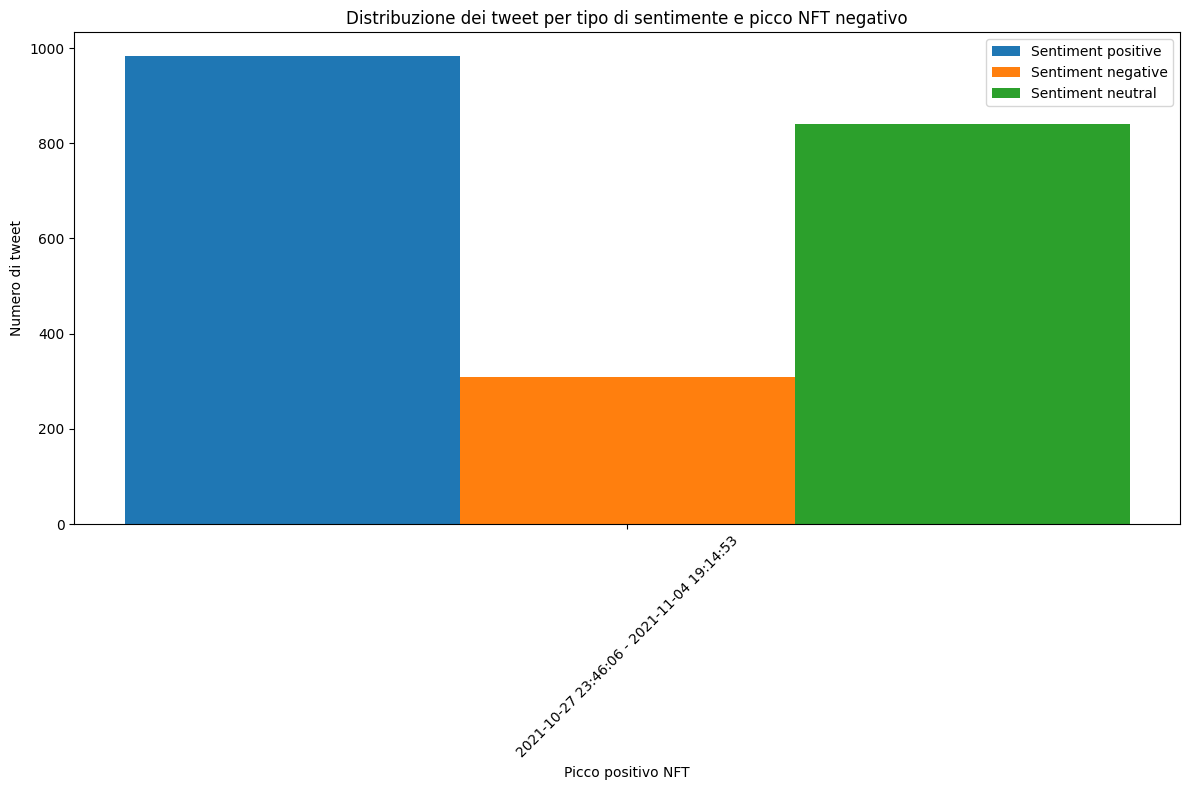

In [155]:
# Creazione dei grafici a barre
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(data_picchi))

# Plotting per i tweet positivi, negativi e neutrali
plt.bar(index, num_tweet_positivi, width=bar_width, label='Sentiment positive')
plt.bar([i + bar_width for i in index], num_tweet_negativi, width=bar_width, label='Sentiment negative')
plt.bar([i + 2 * bar_width for i in index], num_tweet_neutrali, width=bar_width, label='Sentiment neutral')

# Impostazioni grafiche
plt.xlabel('Picco positivo NFT')
plt.ylabel('Numero di tweet')
plt.title('Distribuzione dei tweet per tipo di sentimente e picco NFT negativo')
plt.xticks([i + bar_width for i in index], data_picchi, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


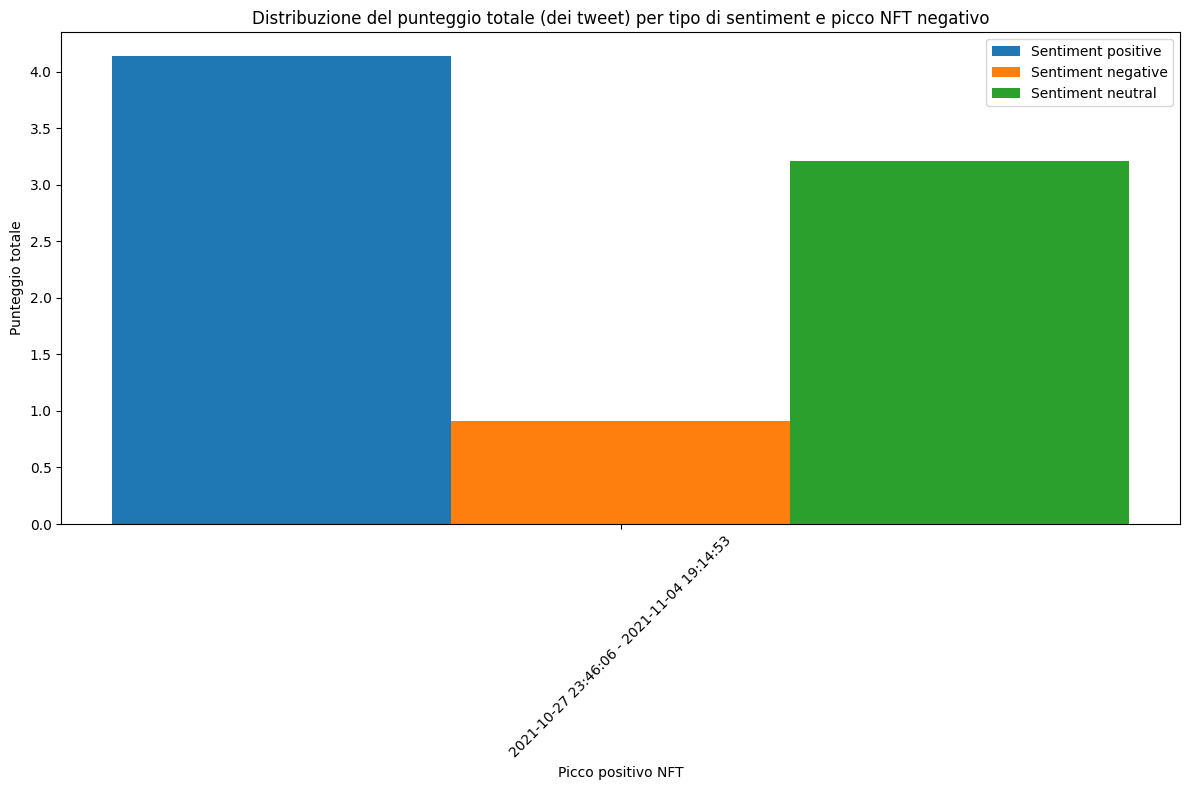

In [156]:
# Creazione dei grafici a barre
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(data_picchi))

# Plotting per i tweet positivi, negativi e neutrali
plt.bar(index, punteggio_totale_positivi, width=bar_width, label='Sentiment positive')
plt.bar([i + bar_width for i in index], punteggio_totale_negativi, width=bar_width, label='Sentiment negative')
plt.bar([i + 2 * bar_width for i in index], punteggio_totale_neutrali, width=bar_width, label='Sentiment neutral')

# Impostazioni grafiche
plt.xlabel('Picco positivo NFT')
plt.ylabel('Punteggio totale')
plt.title('Distribuzione del punteggio totale (dei tweet) per tipo di sentiment e picco NFT negativo')
plt.xticks([i + bar_width for i in index], data_picchi, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [157]:
# Merge con il dataset delle collezioni 
tweets_negativi_collezione = pd.merge(tweets_filtrati_superiori_media_negativi, tweets_collection, left_on='tweet_id', right_on='tweet_id', how='left')
print(tweets_negativi_collezione.head())

           created_at             tweet_id            author_id  \
0 2021-10-24 23:49:16  1452421966703603712  1309399160056147969   
1 2021-10-24 23:49:58  1452422142935580685  1397924799502950409   
2 2021-10-24 23:56:32  1452423796804177921  1409478746109841413   
3 2021-10-24 23:57:04  1452423929289711623           1360665278   
4 2021-10-25 00:00:29  1452424788606169091  1387860767983161345   

                                             content  retweet_count  \
0  Ya boy I drew stuff stream~ # rdsbRen_doodles ...             13   
1  Fun game I saw : name five # NFT projects NOT ...              3   
2     Upgraded @ doodles 💎 https : //t.co/nrG7WVqhRi              1   
3  A doodles gang . Didn ’ forget Steve . https :...              6   
4  🚨Doodles # NFTGiveaway 🚨 Giving away 1 Doodles...              9   

   reply_count  like_count  quote_count  punteggio_totale  \
0            7         121            0          0.001829   
1            3          13            0         